Campo eléctrico:
Elaborar un programa para calcular el campo eléctrico producido por un dipolo eléctrico, realizar una representación del campo para todo el dominio elegido para calcular el campo. Para encontrar el campo, se sugiere hacer lo siguiente:
a. Encontrar el campo en un punto producido por dos cargas q1 y q2
b. Emplee el comando plt.quiver(x, y, Ex, Ey) para mostrar el campo producido por q1 y q2. Puedes intentarlo con el comando, plt.stremplot.
c. Generalice el problema para varios puntos en el espacio.
Se recomienda emplear numpy array.

In [1]:
import numpy as np

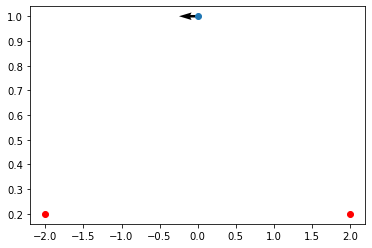

In [2]:
import numpy as np
import matplotlib.pyplot as plt


k = 1

def E_campo(q, r ):
  """
  Magnitud del campo electrico debido a q
  """
  global k
  return k*q/r**2

def E1_campo(q1, r1 ):
  """
  Magnitud del campo electrico debido a q1
  """
  global k
  return k*q1/r1**2


r_source = {"q": np.array([-2., 0.2]), "q1":np.array([2.,0.2] )} #Posicion de las fuentes
rp       = np.array([0,1.])                # Punto para encontrar el campo electrico, eje de simetría



Delta_R =  (r_source["q"]  - rp)
Delta1_R =  -1*(r_source["q1"]  - rp)

  #print("componente delta_R", Delta_R) # r entre q y p
  #print("componente delta_R1" ,Delta1_R)# r entre q1 y p1

#MAGNITUDES DELTA`S_R 

MagDelta_R = np.sqrt(Delta_R[0]**2 + Delta_R[1]**2)
MagDelta1_R = np.sqrt(Delta1_R[0]**2 + Delta1_R[1]**2)

# VECTORES UNITARIOS DE LOS CAMPOS

u_R = Delta_R/MagDelta_R
u1_R = Delta1_R/MagDelta1_R

# CAMPO ELECTRICO DE CADA PARTICULA

E = E_campo(100,MagDelta_R ) * u_R
E1 = E1_campo(100,MagDelta1_R ) * u1_R

# CAMPO LECTRICO TOTAL EN EL PUNTO (0,1)

Et=E+E1
  


plt.figure()
plt.plot(r_source["q"][0], r_source["q"][1], "ro")
plt.plot(r_source["q1"][0], r_source["q1"][1], "ro")
plt.plot(rp[0], rp[1],"o")
plt.quiver(rp[0], rp[1], Et[0], Et[1])



<ipython-input-3-4c9270e9d0a8>:23: RuntimeWarning: invalid value encountered in true_divide
  u_R = Delta_R/MagDelta_R
<ipython-input-2-b797ea69ee4d>:12: RuntimeWarning: divide by zero encountered in double_scalars
  return k*q/r**2
<ipython-input-3-4c9270e9d0a8>:24: RuntimeWarning: invalid value encountered in true_divide
  u1_R = Delta1_R/MagDelta1_R
<ipython-input-2-b797ea69ee4d>:19: RuntimeWarning: divide by zero encountered in double_scalars
  return k*q1/r1**2


(-5.0, 5.0)

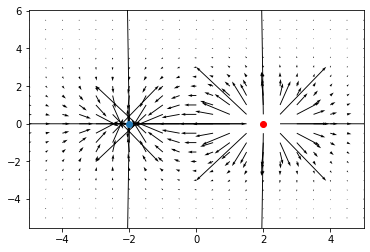

In [3]:
# Definir los puntos donde se se determinara el campo electrico 

def campo_fuente(rsource,rsource1, rp):
   '''
   Parameter
   ---------
   r_source : numpy array de 2D-->posicion donde esta la fuente
   rp       : numpy array de 2D-->posicion donde se quiere conocer el campo electrico

   return
   -----------
   Ex       : componente x del campo electrico
   Ey       : componente x del campo electrico
   '''

  
   Delta_R =  (r_source["q"]  - rp)
   Delta1_R =  -1*(r_source["q1"]  - rp)

   MagDelta_R = np.sqrt(Delta_R[0]**2 + Delta_R[1]**2)
   MagDelta1_R = np.sqrt(Delta1_R[0]**2 + Delta1_R[1]**2)  

   u_R = Delta_R/MagDelta_R
   u1_R = Delta1_R/MagDelta1_R

   E = E_campo(100,MagDelta_R ) * u_R
   E1 = E1_campo(100,MagDelta1_R ) * u1_R
   Et=E+E1
   Ex = Et[0]
   Ey = Et[1]
   return Ex, Ey

x = np.arange(-5,6,0.5)
n1 = len(x)
y = np.arange(-5,6,0.5)
n2 =len(y)
rp = np.zeros((n1*n2, 2))

rp = np.zeros((n1*n2 , 2))
k = 0
for x_ in (x):
  for y_ in (y):
    rp[k] = np.array([x_, y_])
    k=k+1


r_source = {'q': np.array([-2.,0]), 'q1':np.array([2.,0])} # posicion de las fuentes
Et = np.zeros((n1*n2, 2))

for i in range(0,len(rp)):
  Et[i] = campo_fuente(r_source['q'],r_source['q1'],rp[i])


campo_fuente(r_source['q'],r_source['q1'],rp)


plt.plot(r_source["q"][0],r_source["q"][1],   "o" ) 
plt.plot(r_source["q1"][0],r_source["q1"][-1],   "ro" ) 
plt.quiver(rp[:,0], rp[:,1], Et[:,0], Et[:,1])# asignacion de lechas
plt.xlim(-5,5)

Movimiento parabólico:
Un jugador de baloncesto desea saber si encestará su tiro dependiendo de la velocidad inicial, ángulo de lanzamiento y posición respecto a la canasta.
Elabore un programa en el que dada una distancia, velocidad inicial y ángulo, determine si hay cesta. El modelo será bajo partícula, sin la rotación del balón.

Se recomienda emplear numpy array.

In [4]:
import numpy as np
import math
import matplotlib.pyplot as plt
# Datos 

# Diametro del aro=  0.45 m-------> 45 cm
# Diametro del balón= 0.25 m------> 25 cm
# Altura de la cesta respecto al piso= 3.05 m
# Distancia del jugado a la base del aro en el piso= L m


#H=3.05 # altura de la cesta respeto a piso en m 
g=9.81 #constante 
x= float(input("ingrese la distancia horizonatal respecto a la canasta en m: " ))
vi= float(input("ingrese velocidad inicial de lanzamiento m/s: "))
a=float(input("ingrese el agulo de lanzamiento grados: "))




h=2.05
ht=H-h   #DIFERENCIA DE ALTURAS, ALTURA EN LA QUE SE ENCUENTRA LA CESTA
         #MENOS LA ALTURA DEL JUGADOR 


# angulo de tiro minimo

angulo = math.tan(math.radians(33.7))+2*ht/x
angulo1=math.atan(angulo)
angulo_min=math.degrees(angulo1)

#velocidad inicial de tiro

k=g*x
d=math.tan(math.radians(a))-ht/x
an=math.cos(math.radians(a)) **2
vo=math.sqrt( k /(2*d*an))


#velocidad inicial minima  de tiro

vom=math.sqrt(g*(math.sqrt((x**2) + (ht**2))+ht))



print ("velocidad minima" ,vom)
  

if vom<vi<vo:
     print("hay cesta")
else:
    print("no hay cesta")



print ("velocidad minima" ,vom)
print(" el ángulo mínimo de lanzamieno es: ", angulo_min)
print(" el velocidad de lanzamieno es: ", vo)




ingrese la distancia horizonatal respecto a la canasta en m:  3
ingrese velocidad inicial de lanzamiento m/s:  3
ingrese el agulo de lanzamiento grados:  3


NameError: name 'H' is not defined